In [1]:
import jupyterteam_widget
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
w = jupyterteam_widget.HermiteWidget()
w

HermiteWidget(value=-1)

[[   1.    0.    0.    0.    0.    0.    0.]
 [   0.    2.    0.    0.    0.    0.    0.]
 [  -2.    0.    4.    0.    0.    0.    0.]
 [   0.  -12.    0.    8.    0.    0.    0.]
 [  12.    0.  -48.    0.   16.    0.    0.]
 [   0.  120.    0. -160.    0.   32.    0.]
 [-120.    0.  720.    0. -480.    0.   64.]]


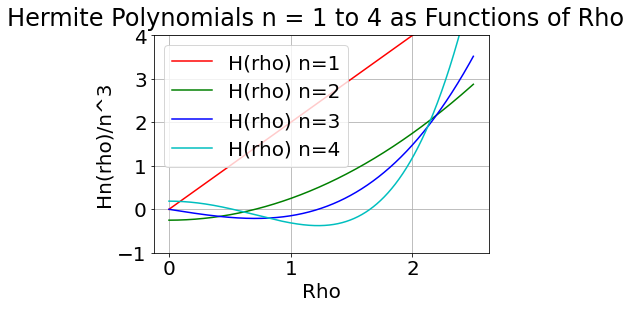

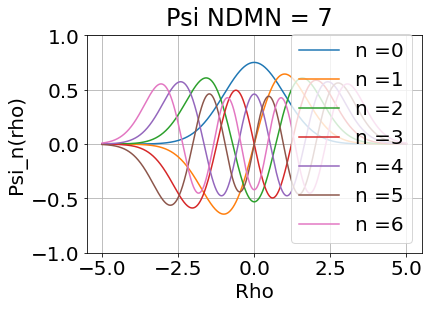

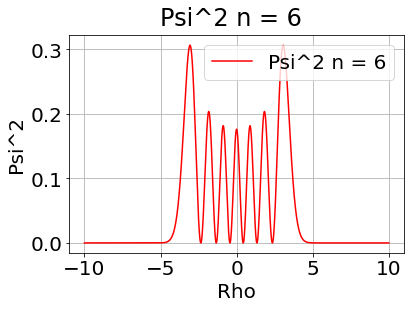

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

NDMN = 7
NARY = np.zeros((NDMN,NDMN)) # array of Hermite coefficients

NARY[0,0] = 1
NARY[1,1] = 2

# fill out the coefficient matrix using equation 4-16
# fails if n < 2
for k in range(NDMN):
    for n in range(NDMN-1):
        NARY[n+1,k] = 2*NARY[n,k-1] - 2*n*NARY[n-1,k]

print(NARY)

# for a given rho, find the hermite polynomial of order n
def hermite(n,rho):
    coefficients = {}
    Hn = 0
    for k in range(n+1):
        coefficients[k] = NARY[n,k]
    for k in coefficients:
        Hn += coefficients[k]*rho**k
    return Hn

# Run the script with `python hermite.py n>=5 plot` in order to plot
# and display Hn[1,4] and the n solutions to the quantum harmonic oscillator
# for -5 < rho < 5. 
# useful constant for np.linspace
INTERVALS = 10**5

# construct x and y values for the plot
rhoAxis = np.linspace(0,2.5,INTERVALS)
H1,H2,H3,H4 = ([] for i in range(4))
for x in rhoAxis:
    H1.append(hermite(1,x))
    H2.append(hermite(2,x)/8)
    H3.append(hermite(3,x)/27)
    H4.append(hermite(4,x)/64)

# complete matplotlib plotting process for figureHermite
plt.rcParams.update({'font.size': 20})
figureHermite = plt.figure(1)
plt.plot(rhoAxis,H1,color='r',label='H(rho) n=1')
plt.plot(rhoAxis,H2,color='g',label='H(rho) n=2')
plt.plot(rhoAxis,H3,color='b',label='H(rho) n=3')
plt.plot(rhoAxis,H4,color='c',label='H(rho) n=4')
plt.suptitle("Hermite Polynomials n = 1 to 4 as Functions of Rho")
plt.xlabel('Rho')
plt.ylabel('Hn(rho)/n^3')
plt.ylim((-1,4))
plt.legend()
plt.grid()

# create axes for psi plots
plt.rcParams.update({'font.size': 20})
figurePsi = plt.figure(2)
rhoPsi = np.linspace(-5,5,INTERVALS)
for n in range(NDMN):
    psi = []
    for x in rhoPsi:
        Hn = hermite(n,x)
        psiCoefficient = math.e**(-x**2/2)/(2**n*math.factorial(n)*(math.pi)**(1/2))**(1/2)
        psi.append(psiCoefficient*Hn)
    plt.plot(rhoPsi,psi)

# Only use a maximum of n = 10 on the legend,
# looks bad otherwise.
legend = []
if NDMN <= 10:
    for i in range(NDMN):
        legend.append('n ='+(str(i)))
else:
    for i in range(10):
        legend.append('n ='+(str(i)))
plt.legend(legend,loc='lower right')

# rest of matplotlib plotting process for figurePsi
plt.suptitle("Psi NDMN = "+str(NDMN))
plt.xlabel('Rho')
plt.ylabel('Psi_n(rho)')
plt.ylim((-1,1))
plt.grid()

# plot for psi^2
plt.rcParams.update({'font.size': 20})
figurePsi2 = plt.figure(3)
rhoPsi2 = np.linspace(-10,10,10**5)
psi2 =[]
for x in rhoPsi2:
    Hn2 = hermite(NDMN-1,x)
    psi2Coefficient = math.e**(-x**2/2)/(2**n*math.factorial(n)*(math.pi)**(1/2))**(1/2)
    psi2.append((psi2Coefficient*Hn2)**2)
plt.plot(rhoPsi2,psi2,color='r',label='Psi^2 n = '+str(NDMN-1))
plt.suptitle("Psi^2 n = "+str(NDMN-1))
plt.legend()
plt.xlabel('Rho')
plt.ylabel('Psi^2')
plt.grid()

plt.show()
